In [64]:
%matplotlib inline

from collections import Counter
import matplotlib.pyplot as plt
import math

In [65]:
## create the data based on Figure 5-1
num_friends = [1] * 22 + [2] * 17 + [3] * 20 + [4] * 20 + [5] * 17\
            + [6] * 22 + [7] * 15 + [8] * 13 + [9] * 18 + [10] * 15\
            + [11] * 1 + [12] * 2 + [13] * 4 + [14] * 2 + [15] * 4\
            + [16] * 1 + [17] * 0 + [18] * 2 + [19] * 2 + [20] * 0\
            + [21] * 2 + [25] * 1 + [40] * 1 + [41] * 1 + [49] * 1\
            + [100] * 1
print(len(num_friends))

204


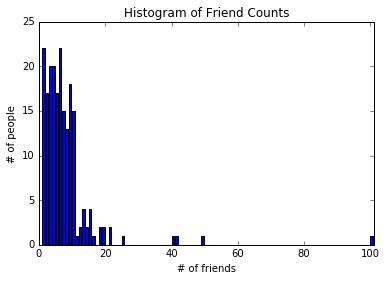

In [66]:
friend_counts = Counter(num_friends)
xs = range(101)  # largest value is 100
ys = [friend_counts[x] for x in xs] #height is just # of friends
plt.bar(xs, ys)
plt.axis([0, 101, 0, 25])
plt.title("Histogram of Friend Counts")
plt.xlabel("# of friends")
plt.ylabel("# of people")
plt.show()

In [67]:
num_points = len(num_friends) # 204
print(num_points)

204


In [68]:
largest_value = max(num_friends)  # 100
smallest_value = min(num_friends) # 1

print(largest_value)
print(smallest_value)


100
1


In [69]:
sorted_values = sorted(num_friends)
smallest_value = sorted_values[0]  # 1
second_smallest_value = sorted_values[1]  # 1
second_largest_value = sorted_values[-2]  #49

print(smallest_value)
print(second_smallest_value)
print(second_largest_value)

1
1
49


**Central Tendencies**

In [70]:
# this isn't right if you don't from __future__ import division 
def mean(x):
    return sum(x) / len(x)
mean(num_friends)
print(mean(num_friends))

7.333333333333333


In [71]:
def median(v):
    """finds the 'middle-most" value of v""" 
    n = len(v)
    sorted_v = sorted(v)
    midpoint = n // 2
    
    if n % 2 == 1:
        # if odd, return the middle value
        return sorted_v[midpoint]
    else:
        # if even, return the average of the middle values
        lo = midpoint - 1
        hi = midpoint
        return (sorted_v[lo] + sorted_v[hi]) / 2
    
median(num_friends) # 6.0

6.0

In [72]:
def quartile(x, p):
    """returns the pth-percentile value in x"""
    p_index = int(p * len(x))
    return sorted(x)[p_index]

print(quartile(num_friends, 0.10)) # 1
print(quartile(num_friends, 0.25)) # 3
print(quartile(num_friends, 0.75)) # 9
print(quartile(num_friends, 0.90)) # 13

1
3
9
13


In [73]:
def mode(x):
    """returns a list, might be more than one mode"""
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items()
           if count == max_count]

mode(num_friends) # 1 and 6

[1, 6]

**Dispersion**

In [74]:
# "range" already means something in Python, so we'll use a different name
def data_range(x):
    return max(x) - min(x)

data_range(num_friends) # 99

99

In [75]:
### from Chapter 4
def dot(v, w):
    """v_1 * w_1 + ... + v_n * w_n"""
    return sum(v_i * w_i
              for v_i, w_i in zip(v, w))

def sum_of_squares(v):
    """v_1 * v_2 + ... + v_n * v_n"""
    return dot(v, v)
###

def de_mean(x):
    """translate x by subtracting it mean (so the result has mean 0)"""
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]

def variance(x):
    """assumes x has at least two elements"""
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations) / (n - 1)

variance(num_friends) # 81.54



81.54351395730708

In [76]:
def standard_deviation(x):
    return math.sqrt(variance(x))

standard_deviation(num_friends) # 9.03

9.030144736232476

**Correlation**

In [98]:
# made a list and adjusted it to output the answer
daily_minutes = [1] * 50 +[6] * 50 + [11.4] * 50\
                + [20.3] * 25 + [21.3] * 25 + [4] * 4
    
    
def covariance(x, y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n - 1)

covariance(num_friends, daily_minutes) # 22.43

22.42824302134647

In [100]:
def correlation(x, y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x, y) / stdev_x / stdev_y
    else:
        return 0  # if no variation, correlation is zero

correlation(num_friends, daily_minutes) # 0.25  #does't match daily minutes


0.3386947084030016

In [102]:
outlier = num_friends.index(100)  # index of outlier
print(outlier)

num_friends_good = [x
                    for i, x in enumerate(num_friends)
                    if i != outlier]
print(num_friends_good)

daily_minutes_good = [x
                      for u, x in enuerate(daily_minutes)
                      if u != outlier]
# print(daily_minutes_good)

correlation(numfriends_good, daily_minutes_good)


203
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 12, 12, 13, 13, 13, 13, 14, 14, 15, 15, 15, 15, 16, 18, 18, 19, 19, 21, 21, 25, 40, 41, 49]


NameError: name 'enuerate' is not defined